Basic code to import and visualize ATLAS/ICESat-2 L3B ATL14 Gridded Antarctic and Arctic Land Ice Height

Author: W. Sauthoff (sauthoff@mines.edu)

In [1]:
# import packages
import rioxarray
import matplotlib.pyplot as plt
import cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# define data directory (replace with your file path)
data_dir = '/Volumes/ExtremeSSD/data/'

In [4]:
# import ICESat-2 ATL15 Gridded Antarctic Land Ice Height data product 
# https://doi.org/10.5067/ATLAS/ATL14.001
file = data_dir + 'altimetry/ICESat2/ATL14.002-Ant/ATL14_AA_0314_100m_002_02.nc'
ATL14_dh = rioxarray.open_rasterio(file, masked=True)
ATL14_dh = ATL14_dh[0]
ATL14_dh

/Users/Wilson/opt/anaconda3/envs/lakeshores/lib/python3.10/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/Users/Wilson/opt/anaconda3/envs/lakeshores/lib/python3.10/site-packages/rioxarray/_io.py:851: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/Users/Wilson/opt/anaconda3/envs/lakeshores/lib/python3.10/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/Users/Wilson/opt/anaconda3/envs/lakeshores/lib/python3.10/site-packages/rioxarray/_io.py:851: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity mat

<xarray.Dataset>
Dimensions:              (y: 44601, x: 54601, band: 1)
Coordinates:
  * y                    (y) float64 2.27e+06 2.27e+06 ... -2.19e+06 -2.19e+06
  * x                    (x) float64 -2.67e+06 -2.67e+06 ... 2.79e+06 2.79e+06
  * band                 (band) int64 1
    Polar_Stereographic  int64 0
Data variables:
    ice_area             (band, y, x) float32 ...
    h                    (band, y, x) float32 ...
    h_sigma              (band, y, x) float32 ...
    data_count           (band, y, x) float32 ...
    misfit_rms           (band, y, x) float32 ...
    misfit_scaled_rms    (band, y, x) float32 ...
Attributes: (12/117)
    description:                        This data set (ATL14) contains season...
    identifier:                         atl14_qa_util
    pulse_rate:                         10000 pps
    type:                               Spacecraft
    wavelength:                         532 nm
    Description:                        Describe the group
    ...                                 ...
    summary:                            The purpose of ATL14 is to provide an...
    time_coverage_duration:             94150869.62631059
    time_coverage_end:                  2022-03-23T03:19:26.843657Z
    time_coverage_start:                2019-03-29T10:18:17.217346Z
    time_type:                          CCSDS UTC-A
    vertical_datum:                     WGS84

In [18]:
# define Ross Ice Shelf bounding box is PS71 coords
x_min = -760000
x_max = 600000
y_min = -1400000
y_max = -350000

# clip dataset to region of interest for faster plotting
mask_x = (ATL14_dh.x >= x_min) & (ATL14_dh.x <= x_max)
mask_y = (ATL14_dh.y >= y_min) & (ATL14_dh.y <= y_max)
ATL14_dh_sub = ATL14_dh.where(mask_x & mask_y, drop=True)

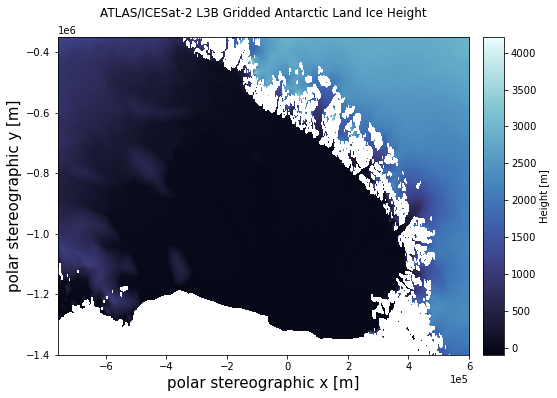

In [19]:
# plot subset dataset
fig, ax = plt.subplots(figsize=(8,8))
sc = ax.imshow(ATL14_dh_sub.h[0,:,:], extent=[x_min, x_max, y_min, y_max], 
        origin='upper', cmap=cmocean.cm.ice)
ax.set_aspect('equal')
ax.ticklabel_format(axis='both',scilimits=(0,0))
ax.set_xlim(min(x_min, x_max),max(x_min, x_max))
ax.set_ylim(min(y_min, y_max),max(y_min, y_max))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.2)
fig.colorbar(sc, cax=cax, label='Height [m]')
ax.set_xlabel('polar stereographic x [m]', size=15)
ax.set_ylabel('polar stereographic y [m]', size=15)
ax.set_title('ATLAS/ICESat-2 L3B Gridded Antarctic Land Ice Height', pad=20)
plt.show()